In [84]:
#import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [85]:
#load and read dataset
df =pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [86]:
#slr
X = df["age"]
y = df["price"]

In [87]:
x_c = sm.add_constant(X)

<Axes: xlabel='age', ylabel='price'>

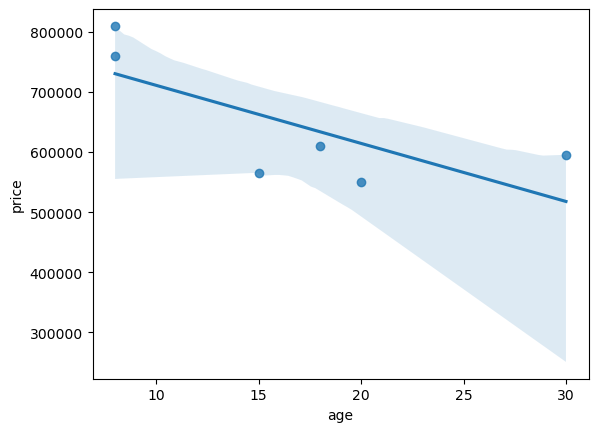

In [88]:
sns.regplot(x="age", y="price", data=df)

In [89]:
#create model
model = sm.OLS(y, x_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     4.677
Date:                Wed, 20 Aug 2025   Prob (F-statistic):             0.0966
Time:                        10:08:17   Log-Likelihood:                -75.245
No. Observations:                   6   AIC:                             154.5
Df Residuals:                       4   BIC:                             154.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.078e+05   8.11e+04      9.957      0.001    5.83e+05    1.03e+06
age        -9665.2111   4469.273     -2.163      0.097   -2.21e+04    2743.481
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.785
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.595
Skew:                          -0.124   Prob(JB):                        0.742
Kurtosis:                       1.477   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# multiple linear regression

In [90]:
#dataset to be  used
df.dropna(inplace=True)
df[:3]

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000


In [91]:
# seperate dependent/label/target from independent/features/predictors/explainers
#indepedent variable
X = df.drop("price", axis=1)

#depedent variable
y = df["price"]

In [92]:
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [93]:
y

0    550000
1    565000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [94]:
#add a constant
x_con = sm.add_constant(X)

In [95]:
#create the model
model2 = sm.OLS(y, x_con).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     6.961
Date:                Wed, 20 Aug 2025   Prob (F-statistic):              0.270
Time:                        10:08:17   Log-Likelihood:                -57.306
No. Observations:                   5   AIC:                             122.6
Df Residuals:                       1   BIC:                             121.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.184e+05   2.71e+05      0.805      0.569   -3.23e+06    3.67e+06
area         108.8386     84.828      1.283      0.421    -969.003    1186.680
bedrooms    2.601e+04   7.86e+04      0.331      0.796   -9.72e+05    1.02e+06
age        -2977.4870   8120.972     -0.367      0.776   -1.06e+05       1e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.371
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.315
Skew:                          -0.514   Prob(JB):                        0.854
Kurtosis:                       2.325   Cond. No.                     4.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# modeling using scikit learn

In [96]:
#load the datset
df2 = pd.read_csv("homeprices.csv")
df2.dropna(inplace=True)
df2[:4]

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [97]:
#seperate features from labels
X = df2.drop("price", axis=1)
y = df2[["price"]]

In [98]:
#create a model
#create lr model object
model3 = LinearRegression()


#train the model
model3.fit(X, y)



LinearRegression()

In [99]:
#check the score
model3.score(X,y)

0.9543026098066569

In [100]:
#check coef
model3.coef_

array([[  108.83858908, 26014.7106632 , -2977.4869961 ]])

In [101]:
#check intercept
model3.intercept_


array([218391.9863459])

In [102]:
#preidct the model
y_pred = model3.predict(X)

y_pred

array([[519866.710013  ],
       [604304.29128739],
       [598930.42912874],
       [760000.        ],
       [796898.56957087]])

In [103]:
y

,price
0,550000
1,565000
3,595000
4,760000
5,810000


In [104]:
#get r2 score
r2 = r2_score(y, y_pred)
print(f" {r2:.4f}")

 0.9543


In [105]:
mse = mean_squared_error(y, y_pred)
mse

527987646.2938865

In [106]:
rms = root_mean_squared_error(y, y_pred)
rms

22977.981771554405

In [107]:
mae = mean_absolute_error(y,y_pred)
mae

17293.888166449942

# Log Transformation

This help to tranform the features to normal distribution which is ideal for model convergence

apart from log transformation, we can also apply BOXCOX

In [108]:
#load the datset
df2 = pd.read_csv("homeprices.csv")
df2.dropna(inplace=True)
df2[:4]

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


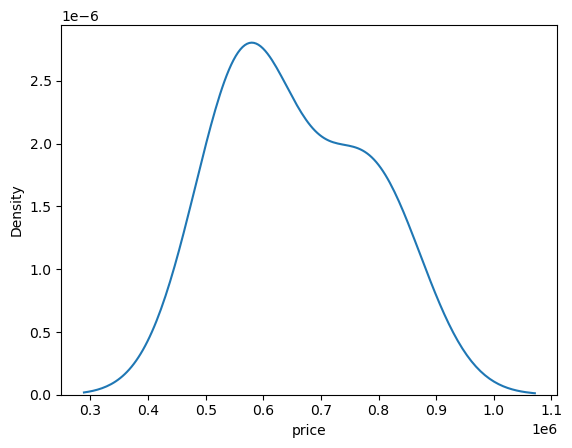

In [109]:
#original price distribution
sns.kdeplot(df2.price);

In [110]:
#log transform price
df2["price"] =np.log(df2["price"])

In [111]:
df2.head()

,area,bedrooms,age,price
0,2600,3.0,20,13.217674
1,3000,4.0,15,13.244581
3,3600,3.0,30,13.296317
4,4000,5.0,8,13.541074
5,4100,6.0,8,13.604790


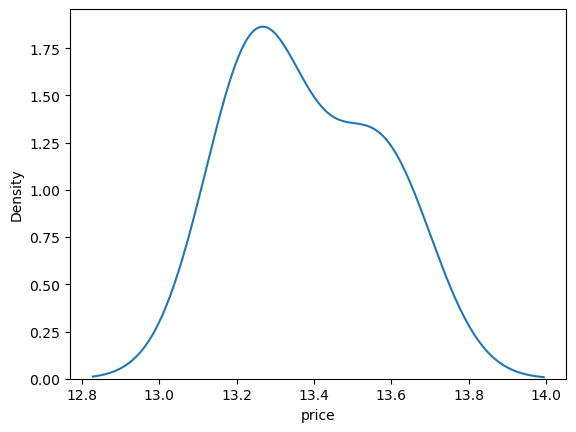

In [112]:
#check distribution of the transformed feature
sns.kdeplot(df2["price"]);

In [113]:
#seperate feautures from label

X = df2.drop("price", axis=1)
y = df2.price


In [114]:
#create model
model4 = LinearRegression()

#train the model
model4.fit(X,y)

LinearRegression()

In [115]:
#Getting help on how manupulate models
?LinearRegression # or use help(LinearRegression())

Object `LinearRegression # or use help(LinearRegression())` not found.


In [116]:
#checking the score
#prvious score: 0.9543026098066569
model4.score(X,y)

0.9594263067482858

In [117]:
# original coeffient array([[  108.83858908, 26014.7106632 , -2977.4869961 ]])

#check coef after log transformation
model4.coef_

array([ 0.00017782,  0.02754592, -0.00513725])

In [123]:
#predict the model
y_pred =model4.predict(X)
y_pred

array([13.17538217, 13.29974369, 13.30183295, 13.54107371, 13.58640197])

In [124]:
y

0    13.217674
1    13.244581
3    13.296317
4    13.541074
5    13.604790
Name: price, dtype: float64

In [122]:
mse =mean_squared_error(y,y_pred)
mse

0.001040002865509292

In [126]:
#check rms
rms = root_mean_squared_error(y,y_pred)
rms

0.032249075420999154

## Feature Preprocessing

# Feature Scaling

In [129]:
#load the datset
df3 = pd.read_csv("homeprices.csv")
df3.dropna(inplace=True)
df3[:4]

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [131]:
#seperating features from label
X = df3.drop("price", axis=1) #features
y = df3.price #label
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


### Normalization/Min_max scaling

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scale the features
maxs = MinMaxScaler()
x_scaled = maxs.fit_transform(X)
pd.DataFrame(x_scaled)

,0,1,2
0,0.000000,0.000000,0.545455
1,0.266667,0.333333,0.318182
2,0.666667,0.000000,1.000000
3,0.933333,0.666667,0.000000
4,1.000000,1.000000,0.000000


In [136]:
#create the model
model5 = LinearRegression()
model5.fit(x_scaled, y)

LinearRegression()

In [138]:
# original score 0.9543026098066569

#model score
model5.score(x_scaled, y)

0.9543026098066566

In [139]:
#original coeffience array([[  108.83858908, 26014.7106632 , -2977.4869961 ]])

#checking model coeffience
model5.coef_


array([163257.88361508,  78044.1319896 , -65504.71391417])

In [141]:
#intercept
model5.intercept_

555596.5539661899

### Standard Scaling/ standardization

In [142]:
#seperating features from label
X = df3.drop("price", axis=1) #features
y = df3.price #label
X

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [143]:
std_s = StandardScaler()
x_std  = std_s.fit_transform(X)
x_std

array([[-1.4871861 , -1.02899151,  0.4602765 ],
       [-0.79547163, -0.17149859, -0.14535047],
       [ 0.24210006, -1.02899151,  1.67153046],
       [ 0.93381453,  0.68599434, -0.99322825],
       [ 1.10674314,  1.54348727, -0.99322825]])

In [144]:
model6 = LinearRegression()
model6.fit(x_std, y)

LinearRegression()

In [145]:
# does not change the model paerfomance
model6.score(x_std, y)

0.9543026098066567

In [146]:
# minmax coeff: ([163257.88361508,  78044.1319896 , -65504.71391417])
#check coeff
model6.coef_

array([ 62938.4491794 ,  30338.10528709, -24581.8556627 ])